This script that computes the correlation between trancript and protein expression at various drug exposures.

In [1]:
import pandas, scipy, seaborn, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.family':'sans-serif',
                            'font.size':20, 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':40})

In [3]:
import mygene
mygenedb = mygene.MyGeneInfo()

# read proteome data

## four hours

In [4]:
four_input_file = '/home/adrian/projects/vigur/data/proteomics/HPMVEC_Proteomics_September_2022/HPMVECs_september2022_4h_all_prts_Relative_Quantification.csv'

In [5]:
metadata = {}

metadata['4h_control'] = ['20220905_ARNAR_010', '20220905_ARNAR_011', '20220905_ARNAR_035', '20220905_ARNAR_036', '20220905_ARNAR_058', '20220905_ARNAR_059']

metadata['4h_epi'] = ['20220905_ARNAR_004', '20220905_ARNAR_005', '20220905_ARNAR_008', '20220905_ARNAR_009', '20220905_ARNAR_051', '20220905_ARNAR_052']

metadata['4h_nor'] = ['20220905_ARNAR_013', '20220905_ARNAR_014', '20220905_ARNAR_019', '20220905_ARNAR_020', '20220905_ARNAR_044', '20220905_ARNAR_046']

metadata['4h_epinor'] = ['20220905_ARNAR_024', '20220905_ARNAR_025', '20220905_ARNAR_026', '20220905_ARNAR_027']

metadata['4h_TNFa'] = ['20220905_ARNAR_060', '20220905_ARNAR_065']

all_sample_names = [element for sublist in list(metadata.values()) for element in sublist]
print(len(all_sample_names))

24


In [6]:
df = pandas.read_csv(four_input_file, index_col=0, skiprows=2, sep=',')
sub = df[(df['Unique peptides'] >= 1) & (df['Confidence score'] >= 0)]
print(sub.shape)

working_labels = [label for label in sub.columns if label in all_sample_names]
proteome4 = sub.loc[:, working_labels]
print(proteome4.shape)
proteome4

(2528, 85)
(2528, 24)


,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_019,20220905_ARNAR_020,20220905_ARNAR_044,20220905_ARNAR_046,20220905_ARNAR_024,20220905_ARNAR_025,20220905_ARNAR_026,20220905_ARNAR_027,20220905_ARNAR_060,20220905_ARNAR_065
Accession,,,,,,,,,,,,,,,,,,,,,
Q86Y97,188.831525,197.069183,175.811650,207.531928,231.297300,180.455442,229.225909,260.583296,239.932247,269.642841,...,213.706837,220.596447,186.348364,164.313714,132.032811,152.621015,155.064497,144.703142,254.600648,288.285081
P07996,67637.285452,69193.314525,73301.239339,73046.035487,76848.532021,75864.367243,51202.056704,52324.792176,57746.065624,57305.252258,...,79871.651922,81503.165314,93321.622575,80580.904597,85574.535420,86860.325257,82302.374968,83774.323647,72500.337035,71473.184557
Q9BYC5,993.299560,919.843549,1003.355518,970.740256,990.124013,995.810114,1143.293690,1252.804708,1235.558835,1251.648153,...,763.500781,692.334917,704.935052,1004.723354,995.810528,968.034925,1064.621665,1053.354635,441.183414,705.386702
P17612,2638.744399,2648.816950,2900.393006,2814.013475,2488.508110,2875.469957,2022.530410,2073.314124,2099.639535,2120.887296,...,2591.592409,2738.611232,2836.111217,2346.707243,2928.801864,3004.747892,2737.224615,2911.889249,2304.086556,1916.376548
Q9NVA2,4838.918786,4948.784886,4805.636475,4859.048664,5117.803643,4985.957711,4799.790804,5048.907774,5604.874184,4896.368168,...,5265.460148,5220.962469,5119.458783,4922.648267,4945.733902,5109.131732,5033.384518,4997.031741,6211.176171,6262.321873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P11940,1962.088894,1923.127831,2025.458574,2013.108214,1941.504901,1987.857362,1704.298560,1695.877455,2060.147162,1745.239649,...,1863.187397,1950.825357,2231.139586,1904.520660,1965.128960,1996.112970,1866.102753,1894.433956,1892.050463,2168.747781
P16402,112.574011,109.101170,148.524786,111.826961,79.276300,22.890700,115.326000,91.787395,70.941235,90.731520,...,102.780835,120.558345,95.194574,70.346098,109.730414,80.549760,93.127875,101.555649,100.098035,81.454289
Q5T9S5,4286.287372,4360.436258,4392.948479,4495.368534,5653.666218,5691.976918,4479.781169,4814.740075,4328.139996,4084.019168,...,4617.046690,4679.230207,5153.364616,5659.209917,4992.276560,4937.083312,4674.033110,4687.569266,4099.772402,5160.915549


In [7]:
new_column_labels = {}
roots = []
for element in proteome4.columns:
    
    # determine the root
    for tag in metadata.keys():
        if element in metadata[tag]:
            root = tag
    roots.append(root)
    
    # determine the rank
    rank = roots.count(root)
    
    # full tag
    full_tag = root + '_' + str(rank)
    new_column_labels[element] = full_tag

# change the names
proteome4.rename(columns = new_column_labels, inplace=True)
proteome4

,4h_epi_1,4h_epi_2,4h_epi_3,4h_epi_4,4h_epi_5,4h_epi_6,4h_control_1,4h_control_2,4h_control_3,4h_control_4,...,4h_nor_3,4h_nor_4,4h_nor_5,4h_nor_6,4h_epinor_1,4h_epinor_2,4h_epinor_3,4h_epinor_4,4h_TNFa_1,4h_TNFa_2
Accession,,,,,,,,,,,,,,,,,,,,,
Q86Y97,188.831525,197.069183,175.811650,207.531928,231.297300,180.455442,229.225909,260.583296,239.932247,269.642841,...,213.706837,220.596447,186.348364,164.313714,132.032811,152.621015,155.064497,144.703142,254.600648,288.285081
P07996,67637.285452,69193.314525,73301.239339,73046.035487,76848.532021,75864.367243,51202.056704,52324.792176,57746.065624,57305.252258,...,79871.651922,81503.165314,93321.622575,80580.904597,85574.535420,86860.325257,82302.374968,83774.323647,72500.337035,71473.184557
Q9BYC5,993.299560,919.843549,1003.355518,970.740256,990.124013,995.810114,1143.293690,1252.804708,1235.558835,1251.648153,...,763.500781,692.334917,704.935052,1004.723354,995.810528,968.034925,1064.621665,1053.354635,441.183414,705.386702
P17612,2638.744399,2648.816950,2900.393006,2814.013475,2488.508110,2875.469957,2022.530410,2073.314124,2099.639535,2120.887296,...,2591.592409,2738.611232,2836.111217,2346.707243,2928.801864,3004.747892,2737.224615,2911.889249,2304.086556,1916.376548
Q9NVA2,4838.918786,4948.784886,4805.636475,4859.048664,5117.803643,4985.957711,4799.790804,5048.907774,5604.874184,4896.368168,...,5265.460148,5220.962469,5119.458783,4922.648267,4945.733902,5109.131732,5033.384518,4997.031741,6211.176171,6262.321873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P11940,1962.088894,1923.127831,2025.458574,2013.108214,1941.504901,1987.857362,1704.298560,1695.877455,2060.147162,1745.239649,...,1863.187397,1950.825357,2231.139586,1904.520660,1965.128960,1996.112970,1866.102753,1894.433956,1892.050463,2168.747781
P16402,112.574011,109.101170,148.524786,111.826961,79.276300,22.890700,115.326000,91.787395,70.941235,90.731520,...,102.780835,120.558345,95.194574,70.346098,109.730414,80.549760,93.127875,101.555649,100.098035,81.454289
Q5T9S5,4286.287372,4360.436258,4392.948479,4495.368534,5653.666218,5691.976918,4479.781169,4814.740075,4328.139996,4084.019168,...,4617.046690,4679.230207,5153.364616,5659.209917,4992.276560,4937.083312,4674.033110,4687.569266,4099.772402,5160.915549


## twentyfour

In [8]:
twentyfour_input_file = '/home/adrian/projects/vigur/data/proteomics/HPMVEC_Proteomics_September_2022/HPMVECs_september2022_24h_all_prts_Relative_Quantification.csv'

In [9]:
metadata = {}

metadata['24h_control'] = ['20220905_ARNAR_022', '20220905_ARNAR_023', '20220905_ARNAR_037', '20220905_ARNAR_038', '20220905_ARNAR_067', '20220905_ARNAR_068']

metadata['24h_epi'] = ['20220905_ARNAR_031', '20220905_ARNAR_040']

metadata['24h_nor'] = ['20220905_ARNAR_028', '20220905_ARNAR_053', '20220905_ARNAR_054', '20220905_ARNAR_062']

metadata['24h_epinor'] = ['20220905_ARNAR_006', '20220905_ARNAR_007', '20220905_ARNAR_033', '20220905_ARNAR_034', '20220905_ARNAR_055']

metadata['24h_TNFa'] = ['20220905_ARNAR_015', '20220905_ARNAR_016', '20220905_ARNAR_017', '20220905_ARNAR_018', '20220905_ARNAR_042', '20220905_ARNAR_043']

all_sample_names = [element for sublist in list(metadata.values()) for element in sublist]
print(len(all_sample_names))

23


In [10]:
df = pandas.read_csv(twentyfour_input_file, index_col=0, skiprows=2, sep=',')
sub = df[(df['Unique peptides'] >= 1) & (df['Confidence score'] >= 0)]
print(sub.shape)

working_labels = [label for label in sub.columns if label in all_sample_names]
proteome24 = sub.loc[:, working_labels]
print(proteome24.shape)
proteome24

(2241, 83)
(2241, 23)


,20220905_ARNAR_022,20220905_ARNAR_023,20220905_ARNAR_037,20220905_ARNAR_038,20220905_ARNAR_067,20220905_ARNAR_068,20220905_ARNAR_015,20220905_ARNAR_016,20220905_ARNAR_017,20220905_ARNAR_018,...,20220905_ARNAR_040,20220905_ARNAR_028,20220905_ARNAR_053,20220905_ARNAR_054,20220905_ARNAR_062,20220905_ARNAR_006,20220905_ARNAR_007,20220905_ARNAR_033,20220905_ARNAR_034,20220905_ARNAR_055
Accession,,,,,,,,,,,,,,,,,,,,,
P05362,4500.598231,4378.032103,4103.905474,4349.892617,4279.145370,4059.749451,33384.566580,33997.113878,27707.013842,28891.362368,...,4601.467327,4167.812372,4514.581888,4553.483464,4485.795989,4736.503557,4617.065213,4333.807381,4249.812067,4434.874940
P00918,8.644058,14.547096,15.499945,4.900813,4.983991,4.281299,9.437474,4.971067,7.868419,4.071027,...,821.030266,424.079015,681.712699,543.632922,723.938589,451.366466,438.010321,643.725430,576.840183,616.884877
Q00005,910.722708,987.334559,1000.936648,945.670561,1032.269871,1001.446530,943.296047,868.336533,929.361034,1026.579492,...,1184.390168,937.523077,898.968767,859.001655,860.516883,1490.200912,1405.411814,1799.564829,1642.424500,1495.606091
P07093,878.272606,768.908487,852.618127,834.944582,1022.914933,805.596743,546.289422,557.282958,655.218905,557.330669,...,1493.498850,1154.893028,1366.130831,1223.722939,1460.684138,1095.431615,1122.829533,1152.472061,1121.003202,1423.883003
Q8N0U7,760.572720,643.716967,855.054111,592.751551,517.169568,524.330666,513.643415,514.884726,561.936597,535.790324,...,2003.565128,1398.912164,2141.095248,1663.856364,1644.593915,1029.760065,995.984036,1200.862495,1135.126518,1071.910379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9NTJ4,7259.288240,7238.468687,7922.619466,8626.455291,8238.897366,8155.931836,7038.226691,7145.379722,7009.746380,7180.604334,...,7654.020459,7852.081194,8180.034131,8759.150223,7895.110300,6629.936533,6879.976096,8416.793417,8651.998277,9676.204551
P60981,7908.695431,7912.697340,7411.488789,7558.075080,8550.230714,7987.524956,7526.372261,6699.314496,7214.082762,7512.507457,...,7914.699938,7562.831023,8105.309835,7495.572451,7688.882526,7518.767710,7128.702665,8399.912294,7642.591405,7517.024368
Q8TBY8,1837.029972,1721.511487,1443.883647,1617.506677,1587.763375,1411.691305,1471.332147,1352.705617,1735.056591,1628.035230,...,1733.016500,1843.134607,1545.688364,1497.760078,1508.632108,1446.885058,1478.890775,1846.348973,1719.370065,1567.048757


In [11]:
new_column_labels = {}
roots = []
for element in proteome24.columns:
    
    # determine the root
    for tag in metadata.keys():
        if element in metadata[tag]:
            root = tag
    roots.append(root)
    
    # determine the rank
    rank = roots.count(root)
    
    # full tag
    full_tag = root + '_' + str(rank)
    new_column_labels[element] = 'p_' + full_tag

# change the names
proteome24.rename(columns = new_column_labels, inplace=True)
proteome24

,p_24h_control_1,p_24h_control_2,p_24h_control_3,p_24h_control_4,p_24h_control_5,p_24h_control_6,p_24h_TNFa_1,p_24h_TNFa_2,p_24h_TNFa_3,p_24h_TNFa_4,...,p_24h_epi_2,p_24h_nor_1,p_24h_nor_2,p_24h_nor_3,p_24h_nor_4,p_24h_epinor_1,p_24h_epinor_2,p_24h_epinor_3,p_24h_epinor_4,p_24h_epinor_5
Accession,,,,,,,,,,,,,,,,,,,,,
P05362,4500.598231,4378.032103,4103.905474,4349.892617,4279.145370,4059.749451,33384.566580,33997.113878,27707.013842,28891.362368,...,4601.467327,4167.812372,4514.581888,4553.483464,4485.795989,4736.503557,4617.065213,4333.807381,4249.812067,4434.874940
P00918,8.644058,14.547096,15.499945,4.900813,4.983991,4.281299,9.437474,4.971067,7.868419,4.071027,...,821.030266,424.079015,681.712699,543.632922,723.938589,451.366466,438.010321,643.725430,576.840183,616.884877
Q00005,910.722708,987.334559,1000.936648,945.670561,1032.269871,1001.446530,943.296047,868.336533,929.361034,1026.579492,...,1184.390168,937.523077,898.968767,859.001655,860.516883,1490.200912,1405.411814,1799.564829,1642.424500,1495.606091
P07093,878.272606,768.908487,852.618127,834.944582,1022.914933,805.596743,546.289422,557.282958,655.218905,557.330669,...,1493.498850,1154.893028,1366.130831,1223.722939,1460.684138,1095.431615,1122.829533,1152.472061,1121.003202,1423.883003
Q8N0U7,760.572720,643.716967,855.054111,592.751551,517.169568,524.330666,513.643415,514.884726,561.936597,535.790324,...,2003.565128,1398.912164,2141.095248,1663.856364,1644.593915,1029.760065,995.984036,1200.862495,1135.126518,1071.910379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9NTJ4,7259.288240,7238.468687,7922.619466,8626.455291,8238.897366,8155.931836,7038.226691,7145.379722,7009.746380,7180.604334,...,7654.020459,7852.081194,8180.034131,8759.150223,7895.110300,6629.936533,6879.976096,8416.793417,8651.998277,9676.204551
P60981,7908.695431,7912.697340,7411.488789,7558.075080,8550.230714,7987.524956,7526.372261,6699.314496,7214.082762,7512.507457,...,7914.699938,7562.831023,8105.309835,7495.572451,7688.882526,7518.767710,7128.702665,8399.912294,7642.591405,7517.024368
Q8TBY8,1837.029972,1721.511487,1443.883647,1617.506677,1587.763375,1411.691305,1471.332147,1352.705617,1735.056591,1628.035230,...,1733.016500,1843.134607,1545.688364,1497.760078,1508.632108,1446.885058,1478.890775,1846.348973,1719.370065,1567.048757


## join both 4 and 24 h

In [12]:
proteome = proteome4.join(proteome24, how='inner')
print(proteome.shape)

(1663, 47)


In [13]:
intersect  = set(proteome4.index) & set(proteome24.index)
print(len(intersect))

1663


In [14]:
proteome

,4h_epi_1,4h_epi_2,4h_epi_3,4h_epi_4,4h_epi_5,4h_epi_6,4h_control_1,4h_control_2,4h_control_3,4h_control_4,...,p_24h_epi_2,p_24h_nor_1,p_24h_nor_2,p_24h_nor_3,p_24h_nor_4,p_24h_epinor_1,p_24h_epinor_2,p_24h_epinor_3,p_24h_epinor_4,p_24h_epinor_5
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,67637.285452,69193.314525,73301.239339,73046.035487,76848.532021,75864.367243,51202.056704,52324.792176,57746.065624,57305.252258,...,230789.552293,267627.367336,241854.448927,248294.562014,248897.715761,148947.368109,152465.038006,242514.692880,233339.660536,240174.648466
Q9BYC5,993.299560,919.843549,1003.355518,970.740256,990.124013,995.810114,1143.293690,1252.804708,1235.558835,1251.648153,...,4515.176613,3634.238552,4931.641539,5151.780170,4241.390840,3196.066525,3350.779374,4890.607166,4777.834576,4737.674172
P17612,2638.744399,2648.816950,2900.393006,2814.013475,2488.508110,2875.469957,2022.530410,2073.314124,2099.639535,2120.887296,...,14791.315176,13892.963049,15190.196002,14576.541160,15503.391382,9691.592706,9649.571060,14331.587771,13903.811274,15397.257098
Q9NVA2,4838.918786,4948.784886,4805.636475,4859.048664,5117.803643,4985.957711,4799.790804,5048.907774,5604.874184,4896.368168,...,372.405707,207.313395,290.212010,208.099725,329.642903,377.606223,368.121682,267.152415,300.126811,271.921569
P09382,67550.002848,71004.179839,71110.119555,73362.745496,84656.018661,83967.617668,74501.696351,74569.682940,95214.815551,94194.599276,...,112008.896686,125164.268781,117015.300665,117241.098308,111457.365034,71611.106947,72898.043843,108434.284426,103326.256311,117118.758135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q8N283,6673.548446,6301.716693,6179.773380,6280.999722,13317.350223,11741.780511,7962.679886,7515.640520,9963.385650,8712.015475,...,1078.861271,1002.803203,879.989593,817.150671,813.609993,974.285928,947.286383,1132.034544,1129.090029,874.551353
P16402,112.574011,109.101170,148.524786,111.826961,79.276300,22.890700,115.326000,91.787395,70.941235,90.731520,...,7469.847839,6946.525230,8988.982929,8954.285821,9129.035491,4934.280409,5132.393717,7379.526380,7042.074050,8267.868811
Q5T9S5,4286.287372,4360.436258,4392.948479,4495.368534,5653.666218,5691.976918,4479.781169,4814.740075,4328.139996,4084.019168,...,1019.792641,1229.885692,1081.952704,1171.702608,1034.598617,1174.138199,1213.505786,1144.106105,1167.059916,1057.239888


### analysis of variability

In [15]:
# determine overall variation as in PMID 17269738

In [29]:
log10proteome = numpy.log10(proteome + 1)
print(log10proteome.shape)

cv = log10proteome.std(axis=1) / log10proteome.mean(axis=1)

print(cv.min(), cv.max())

(1663, 47)
0.008027596030959561 0.8730284658538606


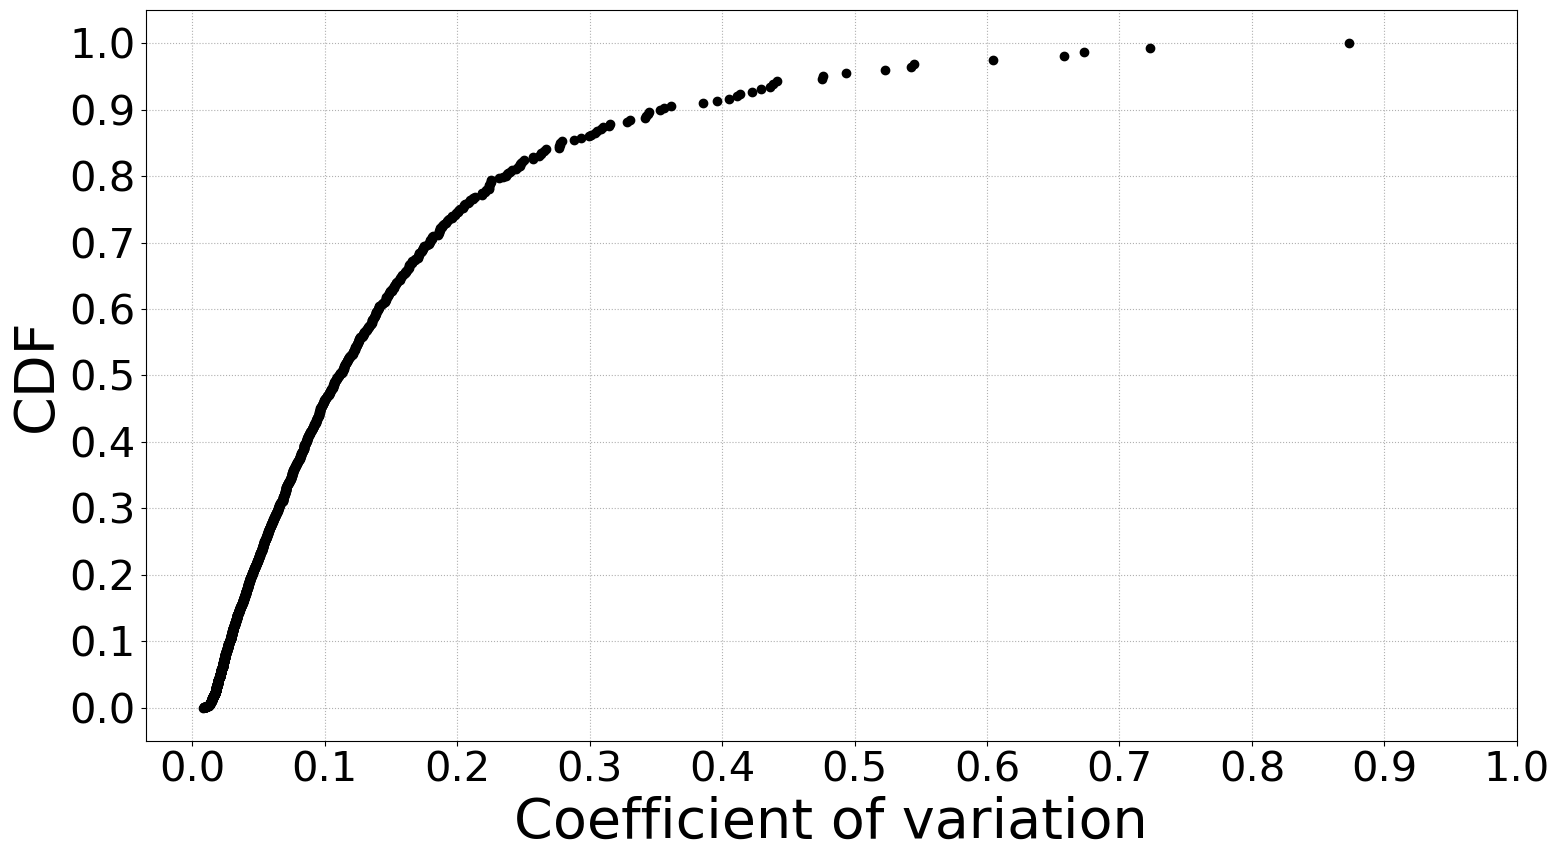

In [58]:
# CDF
sorted_cv = cv.sort_values()
y = numpy.cumsum(sorted_cv) / numpy.sum(sorted_cv)
matplotlib.pyplot.plot(sorted_cv, y, 'o', color='black')

matplotlib.pyplot.xlabel('Coefficient of variation')
matplotlib.pyplot.ylabel('CDF')

matplotlib.pyplot.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
matplotlib.pyplot.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# determine proteins for which we have gene IDs

In [ ]:
expression_file = '/home/adrian/projects/vigur/results/sequencing/tpm/DESeq2_TPM_values.tsv'

In [ ]:
expression = pandas.read_csv(expression_file, index_col=0, sep='\t')
print(expression.shape)
expression.head()

In [ ]:
def uniprot2ensembl_mapper(split):
    
    incidents = []
    entrezid = None; ensemblid = None
    
    # mapping to entrez
    if len(mygenedb.query(split)['hits']) == 0:
        pass
    elif len(mygenedb.query(split)['hits']) == 1:
        entrezid = mygenedb.query(split)['hits'][0]['_id']
    else:
        #print('\t {}'.format(mygenedb.query(split)['hits']))
        entrezid = mygenedb.query(split)['hits'][0]['_id']
        #print('\t WARNING: multiple entezid mapping, selecting the first: {}'.format(entrezid))
    
    # from entrez to ensembl
    if entrezid != None:
        #print(f'\t working with {entrezid}')
        call = mygenedb.getgene(entrezid, fields='ensembl')
        if 'ensembl' in call:
            hits = call['ensembl']
            if type(hits) == dict:
                ensemblid = hits['gene']
                if ensemblid in expression.index:
                    incidents.append(ensemblid)
                else:
                    print(f'\t ENSEMBL ID {ensemblid} not found.')
            elif type(hits) == list:
                #print(len(hits), hits)
                for hit in hits:
                    ensemblid = hit['gene']
                    if ensemblid in expression.index:
                        incidents.append(ensemblid)
                    else:
                        print(f'\t ENSEMBL ID {ensemblid} not found in expression')
            else:
                print(call)
                print('\t WARNING: Data type not detected.')
        
    return incidents

#
# main
#
rosetta = {}
for element in proteome.index:
    #print(element)
    
    rosetta[element] = []
    
    # split identifiers
    splitted_tag = element.split(';')
    for split in splitted_tag:
        incidents = uniprot2ensembl_mapper(split)
        for incident in incidents:
            rosetta[element].append(incident)
    
    # deal with mapping options
    if len(rosetta[element]) == 0:
        #print(f'dropping Uniprot {element} for lack of mapping')
        del rosetta[element]
    
    elif len(rosetta[element]) > 1:
        #print(rosetta[element])
        #print(f'{element} mapps to {incidents}. Selecting first')
        rosetta[element] = rosetta[element][:1]
        #print(rosetta[element])   
    
    
    #else:
        
        # informative print
        #print(f'final mapping {rosetta[element]}')
        
    #print()
    
new_rosetta = {}
for uniprot in rosetta:
    new_rosetta[uniprot] = rosetta[uniprot][0]
rosetta = new_rosetta
inverse_rosetta = {v: k for k, v in rosetta.items()}

In [ ]:
print(proteome.shape)
print(len(rosetta)) 

In [ ]:
missing_proteins = [element for element in proteome.index if element not in rosetta.keys()]
print(missing_proteins)

In [ ]:
proteome.drop(missing_proteins, axis=0, inplace=True)
proteome.sort_index(inplace=True)
print(proteome.shape)
proteome

# read expression

In [ ]:
geneids = [rosetta[element] for element in rosetta.keys()]
print(geneids[:10])

In [ ]:
# slice the genes we are interested
selected_expression = expression.loc[geneids,:]

In [ ]:
# change it to protein names
selected_expression.rename(index=inverse_rosetta, inplace=True)
print(selected_expression.shape)
selected_expression.head()

In [ ]:
# subset and label conditions

In [ ]:
metadata_file = '/home/adrian/projects/vigur/data/sequencing/metadata/metadata.tsv'
metadata = pandas.read_csv(metadata_file, sep='\t')
metadata = metadata.loc[metadata['time'] != 'zero', :]
metadata = metadata.loc[metadata['treatment'] != 'mix_plus_ilo', :]
metadata = metadata.loc[metadata['treatment'] != 'ilo_only', :]
metadata

In [ ]:
metadata_mapper = {}
for index, row in metadata.iterrows():
    new_label = '{}_{}_{}_{}_{}'.format(row['run'], row['experiment'], row['time'], row['treatment'], row['replicate'])
    metadata_mapper[row['sampleID']] = new_label

In [ ]:
selected_expression.rename(columns=metadata_mapper, inplace=True)
dropping_samples = [sample for sample in selected_expression.columns if ('072' in sample) or ('073' in sample)]
print(dropping_samples)
selected_expression.drop(dropping_samples, axis=1, inplace=True)
print(selected_expression.shape)
print(selected_expression.columns)
selected_expression.sort_index(inplace=True)
selected_expression

# implement correlations

In [ ]:
print(len(proteome.columns))
print(len(set(proteome.columns)))
print(len(selected_expression.columns))
print(len(set(selected_expression.columns)))

In [ ]:
container_pearson = {}
for proteome_condition in proteome.columns:
    info = []
    for transcriptome_condition in selected_expression.columns:
        y = proteome.loc[:, proteome_condition]
        x = selected_expression.loc[:, transcriptome_condition]
        scc = scipy.stats.spearmanr(x, y)
        info.append(scc[0])
    container_pearson[proteome_condition] = info

In [ ]:
df = pandas.DataFrame.from_dict(container_pearson)
df.set_index(selected_expression.columns, inplace=True)
tdf = df.transpose()

In [ ]:
# just plotting
all_values = list(tdf.values.flatten())
all_values.sort(reverse=True)
top = all_values[4]
bottom = all_values[-6]

for proteome_condition in proteome.columns:
    for transcriptome_condition in selected_expression.columns:
        y = proteome.loc[:, proteome_condition]
        x = selected_expression.loc[:, transcriptome_condition]
        scc = scipy.stats.spearmanr(x, y)
        if scc[0] >= top or scc[0] <= bottom:
            
            rx = x.rank(pct=True)
            ry = y.rank(pct=True)
            
            matplotlib.pyplot.plot(rx, ry, 'o', color='black', alpha=1/3, mec=None)
            
            result = scipy.stats.linregress(rx, ry)
            floor = numpy.min(rx); ceiling = numpy.max(rx)
            model_floor = result.slope*floor + result.intercept
            model_ceiling = result.slope*ceiling + result.intercept
            matplotlib.pyplot.plot([floor, ceiling], [model_floor, model_ceiling], '-', lw=2, color='tab:blue')
            
            the_title='P:{}; T:{}; SCC={:.2f}'.format(proteome_condition, transcriptome_condition, scc[0])
            matplotlib.pyplot.title(the_title)
            matplotlib.pyplot.xlabel('Proteome')
            matplotlib.pyplot.ylabel('Transcriptome')
            matplotlib.pyplot.grid(ls=':')
            matplotlib.pyplot.tight_layout()
            
            matplotlib.pyplot.show()

In [ ]:
proteome_colors = []
for element in tdf.index:
    if 'control' in element:
        proteome_colors.append('tab:gray')
    elif '_epi_' in element:
        proteome_colors.append('tab:orange')
    elif '_nor_' in element:
        proteome_colors.append('tab:purple')
    elif '_epinor_' in element:
        proteome_colors.append('tab:red')
    elif 'TNF' in element:
        proteome_colors.append('tab:green')
    else:
        raise ValueError('something not detected')

for i in range(len(tdf.index)):
    print(tdf.index[i], proteome_colors[i])

In [ ]:
transcriptome_colors = []
for element in tdf.columns:
    if 'zero' in element:
        transcriptome_colors.append('tab:gray')
    elif 'epi' in element:
        transcriptome_colors.append('tab:orange')
    elif 'nor' in element:
        transcriptome_colors.append('tab:purple')
    elif 'mix' in element:
        transcriptome_colors.append('tab:red')
    elif 'TNF' in element:
        transcriptome_colors.append('tab:green')
    else:
        raise ValueError('something not detected')
        
for i in range(len(tdf.columns)):
    print(tdf.columns[i], transcriptome_colors[i])

In [ ]:
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(tdf, 
                   cmap='cividis', 
                   vmin=tdf.min().min(), vmax=tdf.max().max(), 
                   method=linkage_method, metric=distance_metric, 
                   cbar_kws={'label':'SCC'}, 
                   xticklabels=1, 
                   yticklabels=1,
                   row_colors=proteome_colors,
                   col_colors=transcriptome_colors
                  )

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.xlabel('sd')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()